## Lab 12 Part I: Plotting Skew-<i>T</i>, ln-<i>p</i> diagrams
<br /><br />
In this next to final exercise, we are going to create more Skew-<i>T</i>, ln-<i>p</i> diagrams at multiple specified locations using observations to aid in identifying common features. 
<br />
### Module Documentation

1. Matplotlib Pyplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
2. Siphon Wyoming Upper Air: https://unidata.github.io/siphon/latest/api/simplewebservice.html#siphon.simplewebservice.wyoming.WyomingUpperAir.request_data
3. MetPy Skew T: https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html




If you have any questions about the code below, feel free to reach out to me at mpvossen@uwm.edu. I am always willing to further explain the code. <br /> <br />

---

<br />
1. As usual, we start by importing the modules we need for our Python code.

In [1]:
#from python's date and time module (from datetime) import the ability to work with date and times (import datetime)
from datetime import datetime

#using the module siphon and its ability to retrieve files from online resources (.simplewebservice), specifically for the University of Wyoming (.wyoming), 
#import the ability to download from the University of Wyoming's upper-air data archive
from siphon.simplewebservice.wyoming import WyomingUpperAir

#from metpy's plotting abilities, import the SkewT plotting class
from metpy.plots import SkewT

#import the plotting abilities of the module matplotlib (import matplotlib.pyplot) and save it to plt
import matplotlib.pyplot as plt

#from metpy's units feature (metpy.units), import the ability to assign and convert units (units)
from metpy.units import units

<br /><br />
2. To make things easy today, copy your skew-T plotting function from Lab 11 into the cell below since we need the same plots as in Lab 11.

In [2]:
def plot_skewT(data, station, valid_time):
   
    p = data['pressure'].values * units.hPa
    T = data['temperature'].values * units.degC
    Td = data['dewpoint'].values * units.degC
    u = data['u_wind'].values * units.kt 
    v = data['v_wind'].values * units.kt
    
    
   
    fig = plt.figure(figsize=(9,9),dpi=300)

    
    
    
    skew = SkewT(fig, rotation=45)
    
    
    
    skew.ax.set_ylim(1000, 100)
    skew.ax.set_xlim(-30, 40)
    
    
    skew.plot(p,T,color='r')
    skew.plot(p,Td,color='g')
    
   
    wind_slice = slice(None, None, 3)
    
    
   
    skew.plot_barbs(p[wind_slice], u[wind_slice], v[wind_slice], length=5, xloc=1.05)
    
    
   
    skew.plot_moist_adiabats(colors='b',linewidths = 0.5, linestyles="solid")
    skew.plot_dry_adiabats(colors='k',linewidths = 0.5, linestyles="solid")
    skew.plot_mixing_lines(mixing_ratio=None,colors='g',linewidths = 0.5, linestyles="dashed")
    
    
    

  
    skew.ax.set_xlabel("Temperature ($\degree$C)")
    skew.ax.set_ylabel("Pressure (hPa)")
    
    
   
    plt.title(f"Valid:{time:%m/%d/%Y %H%M} UTC",size=8,loc="right")
    plt.title(f"Station: {site}",size=8,loc="left")
    
    

<br /><br />
3. In the code section below, we need to make 5 Skew-T plots for the dates and stations below.  In the code cell below, setup a loop similar to that in Lab 11 to generate the required soundings.

| Time | Sounding Site |
|:----:|:----------:|
| 5/20/2013 1200 UTC | OUN |
| 7/12/2016 0000 UTC | MPX |
| 2/2/2011 0000 UTC | ILX |
| 5/3/1999 1200 UTC | OUN |
| 5/19/2013 1200 UTC | OUN|


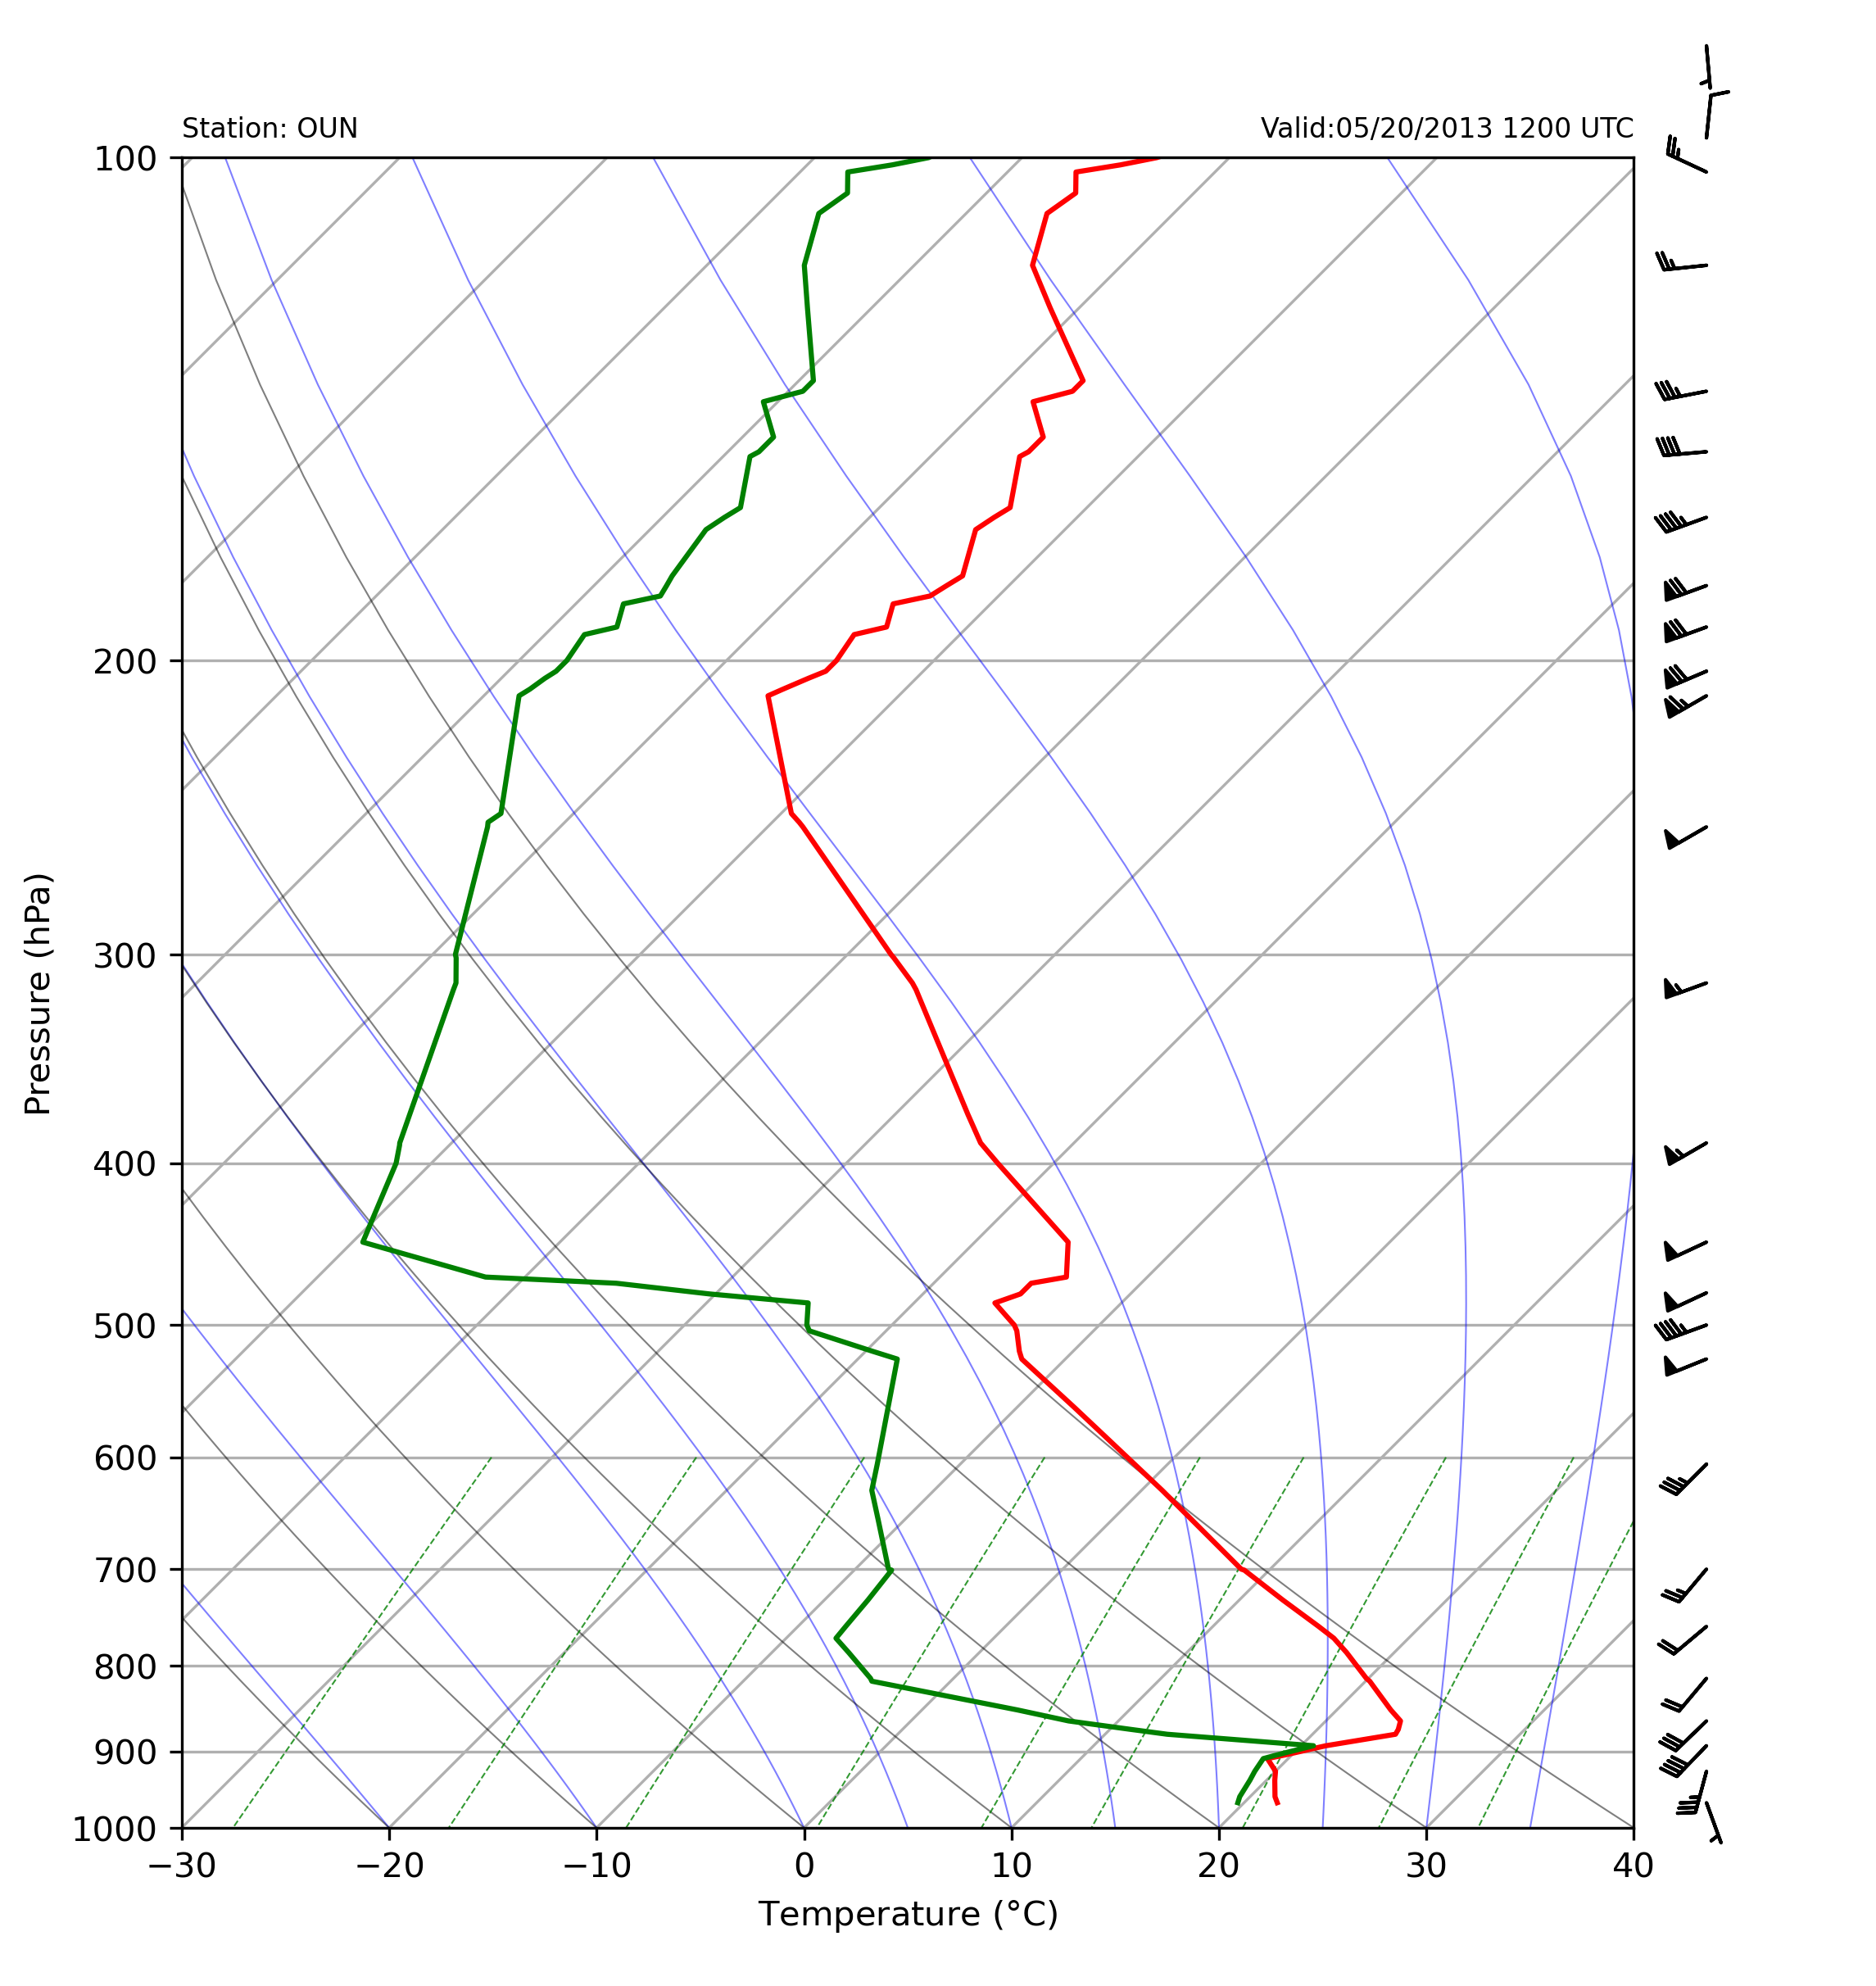

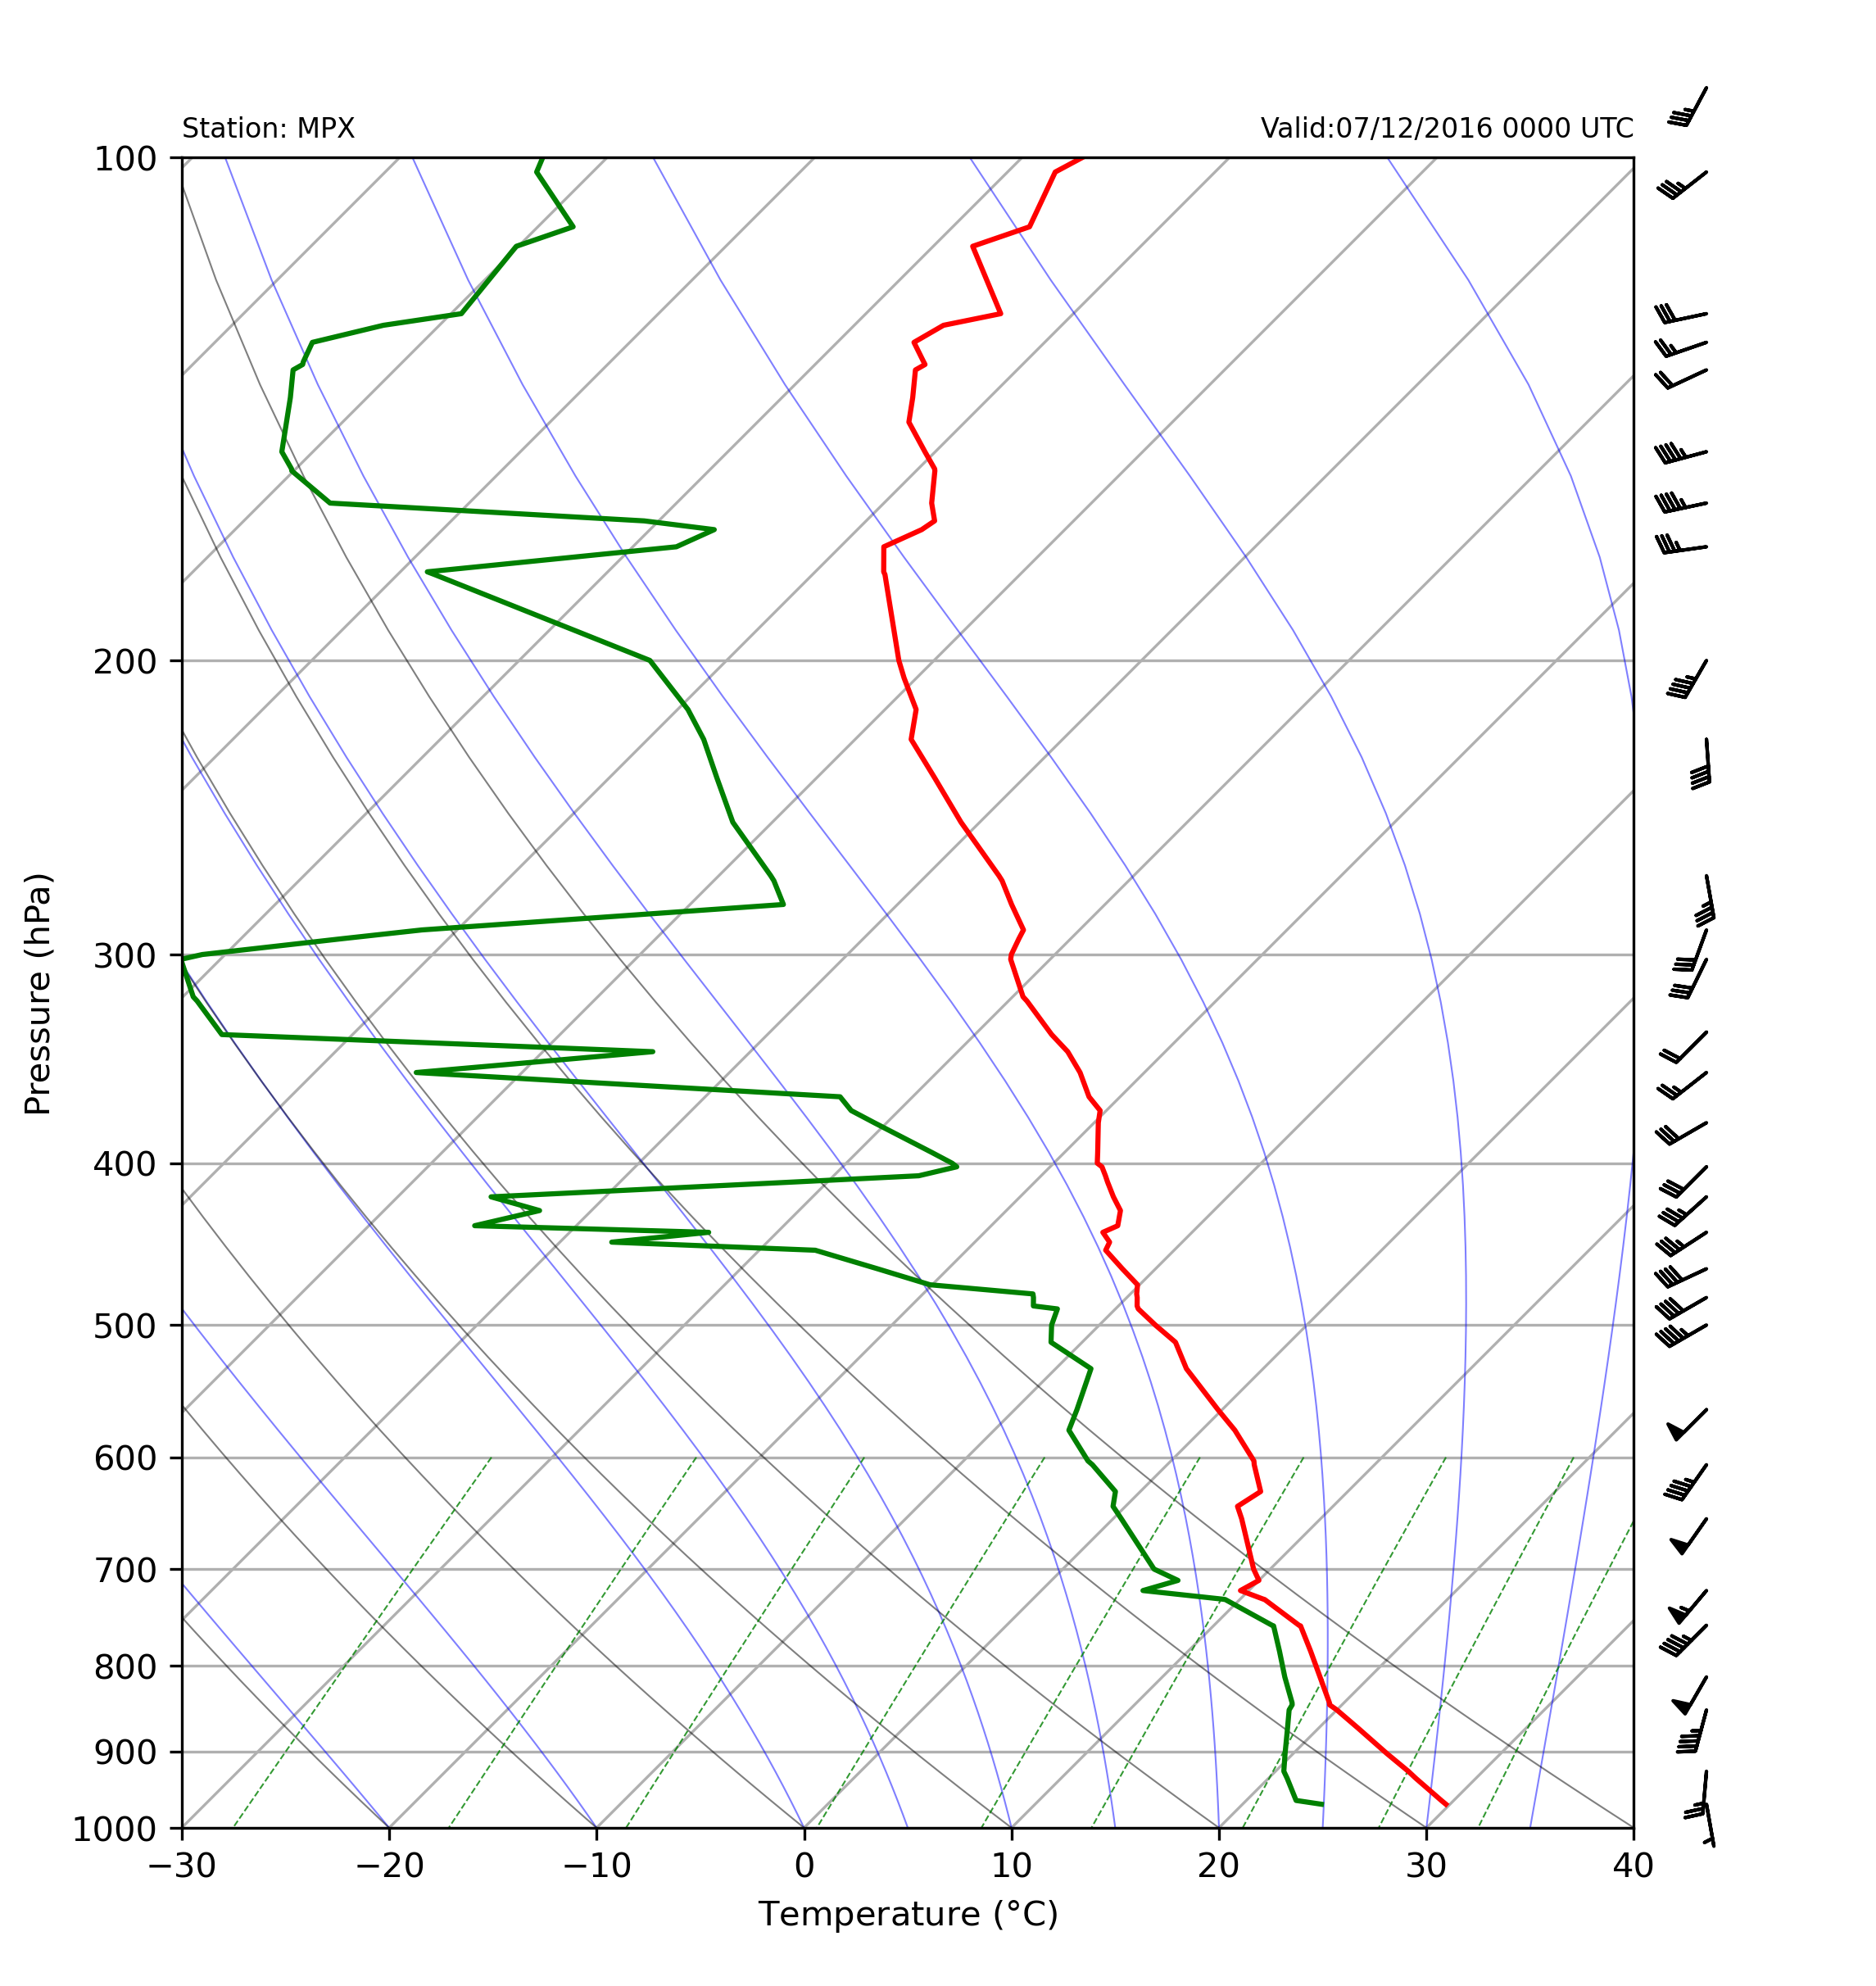

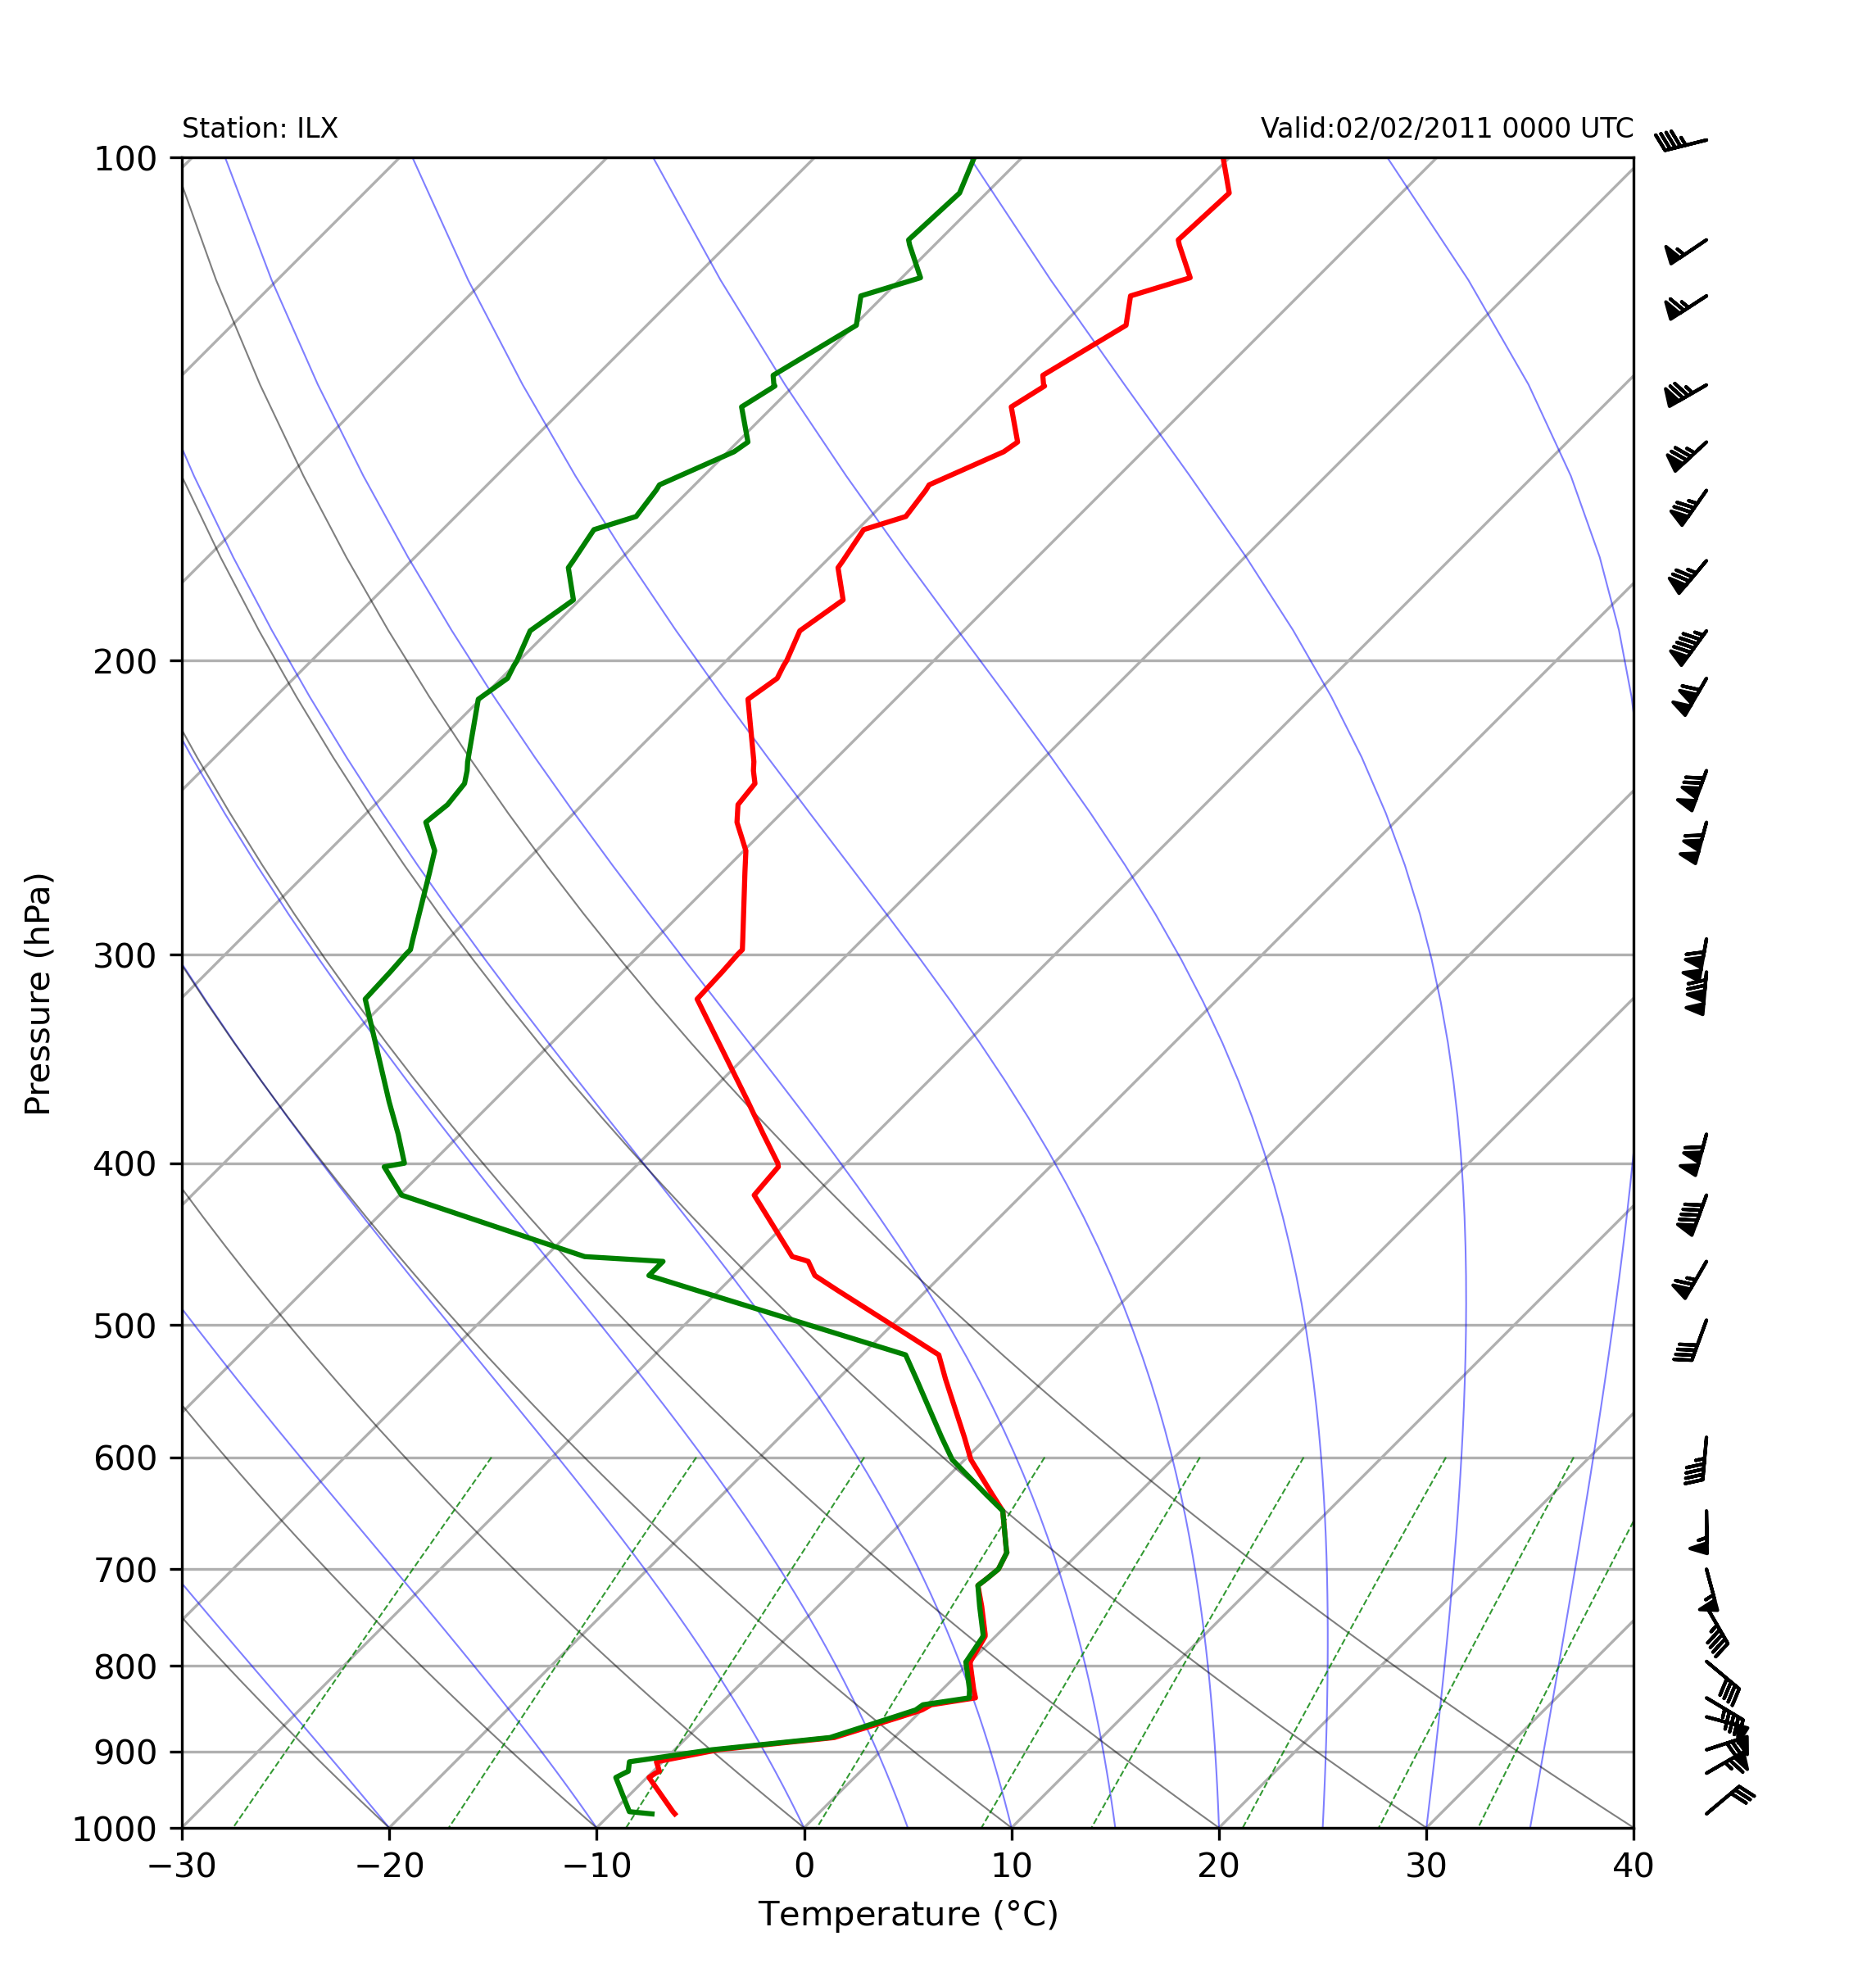

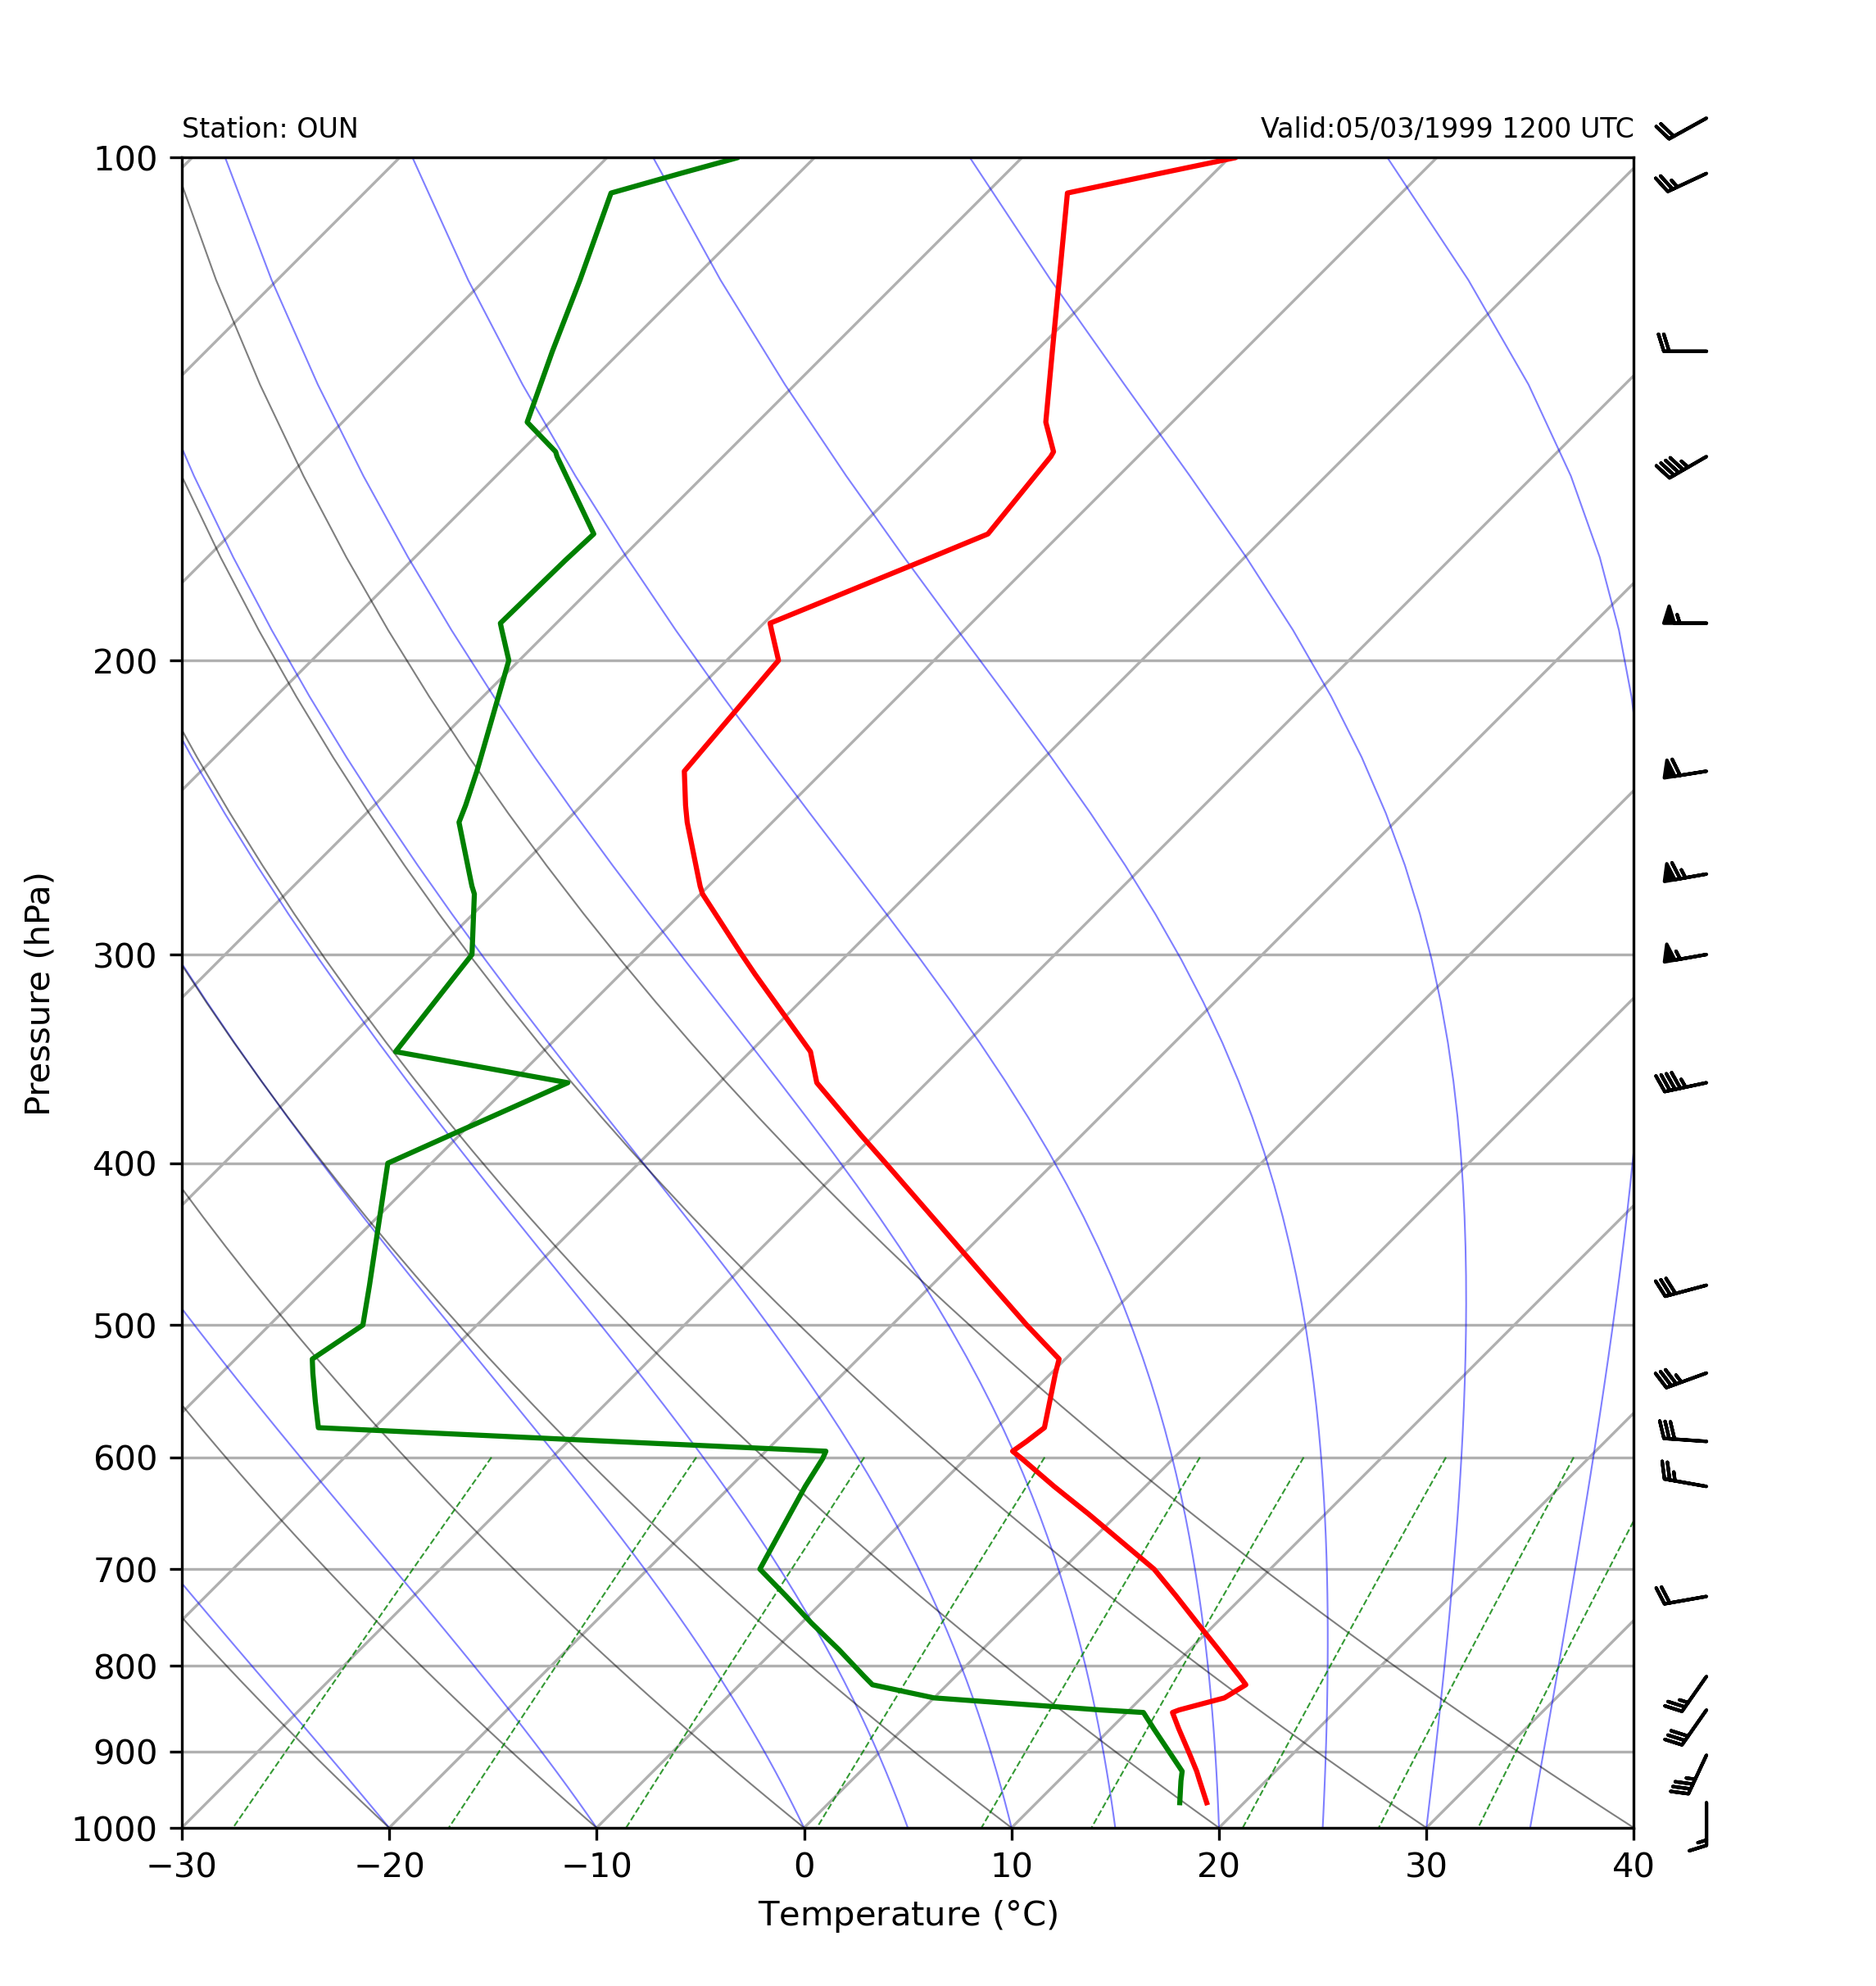

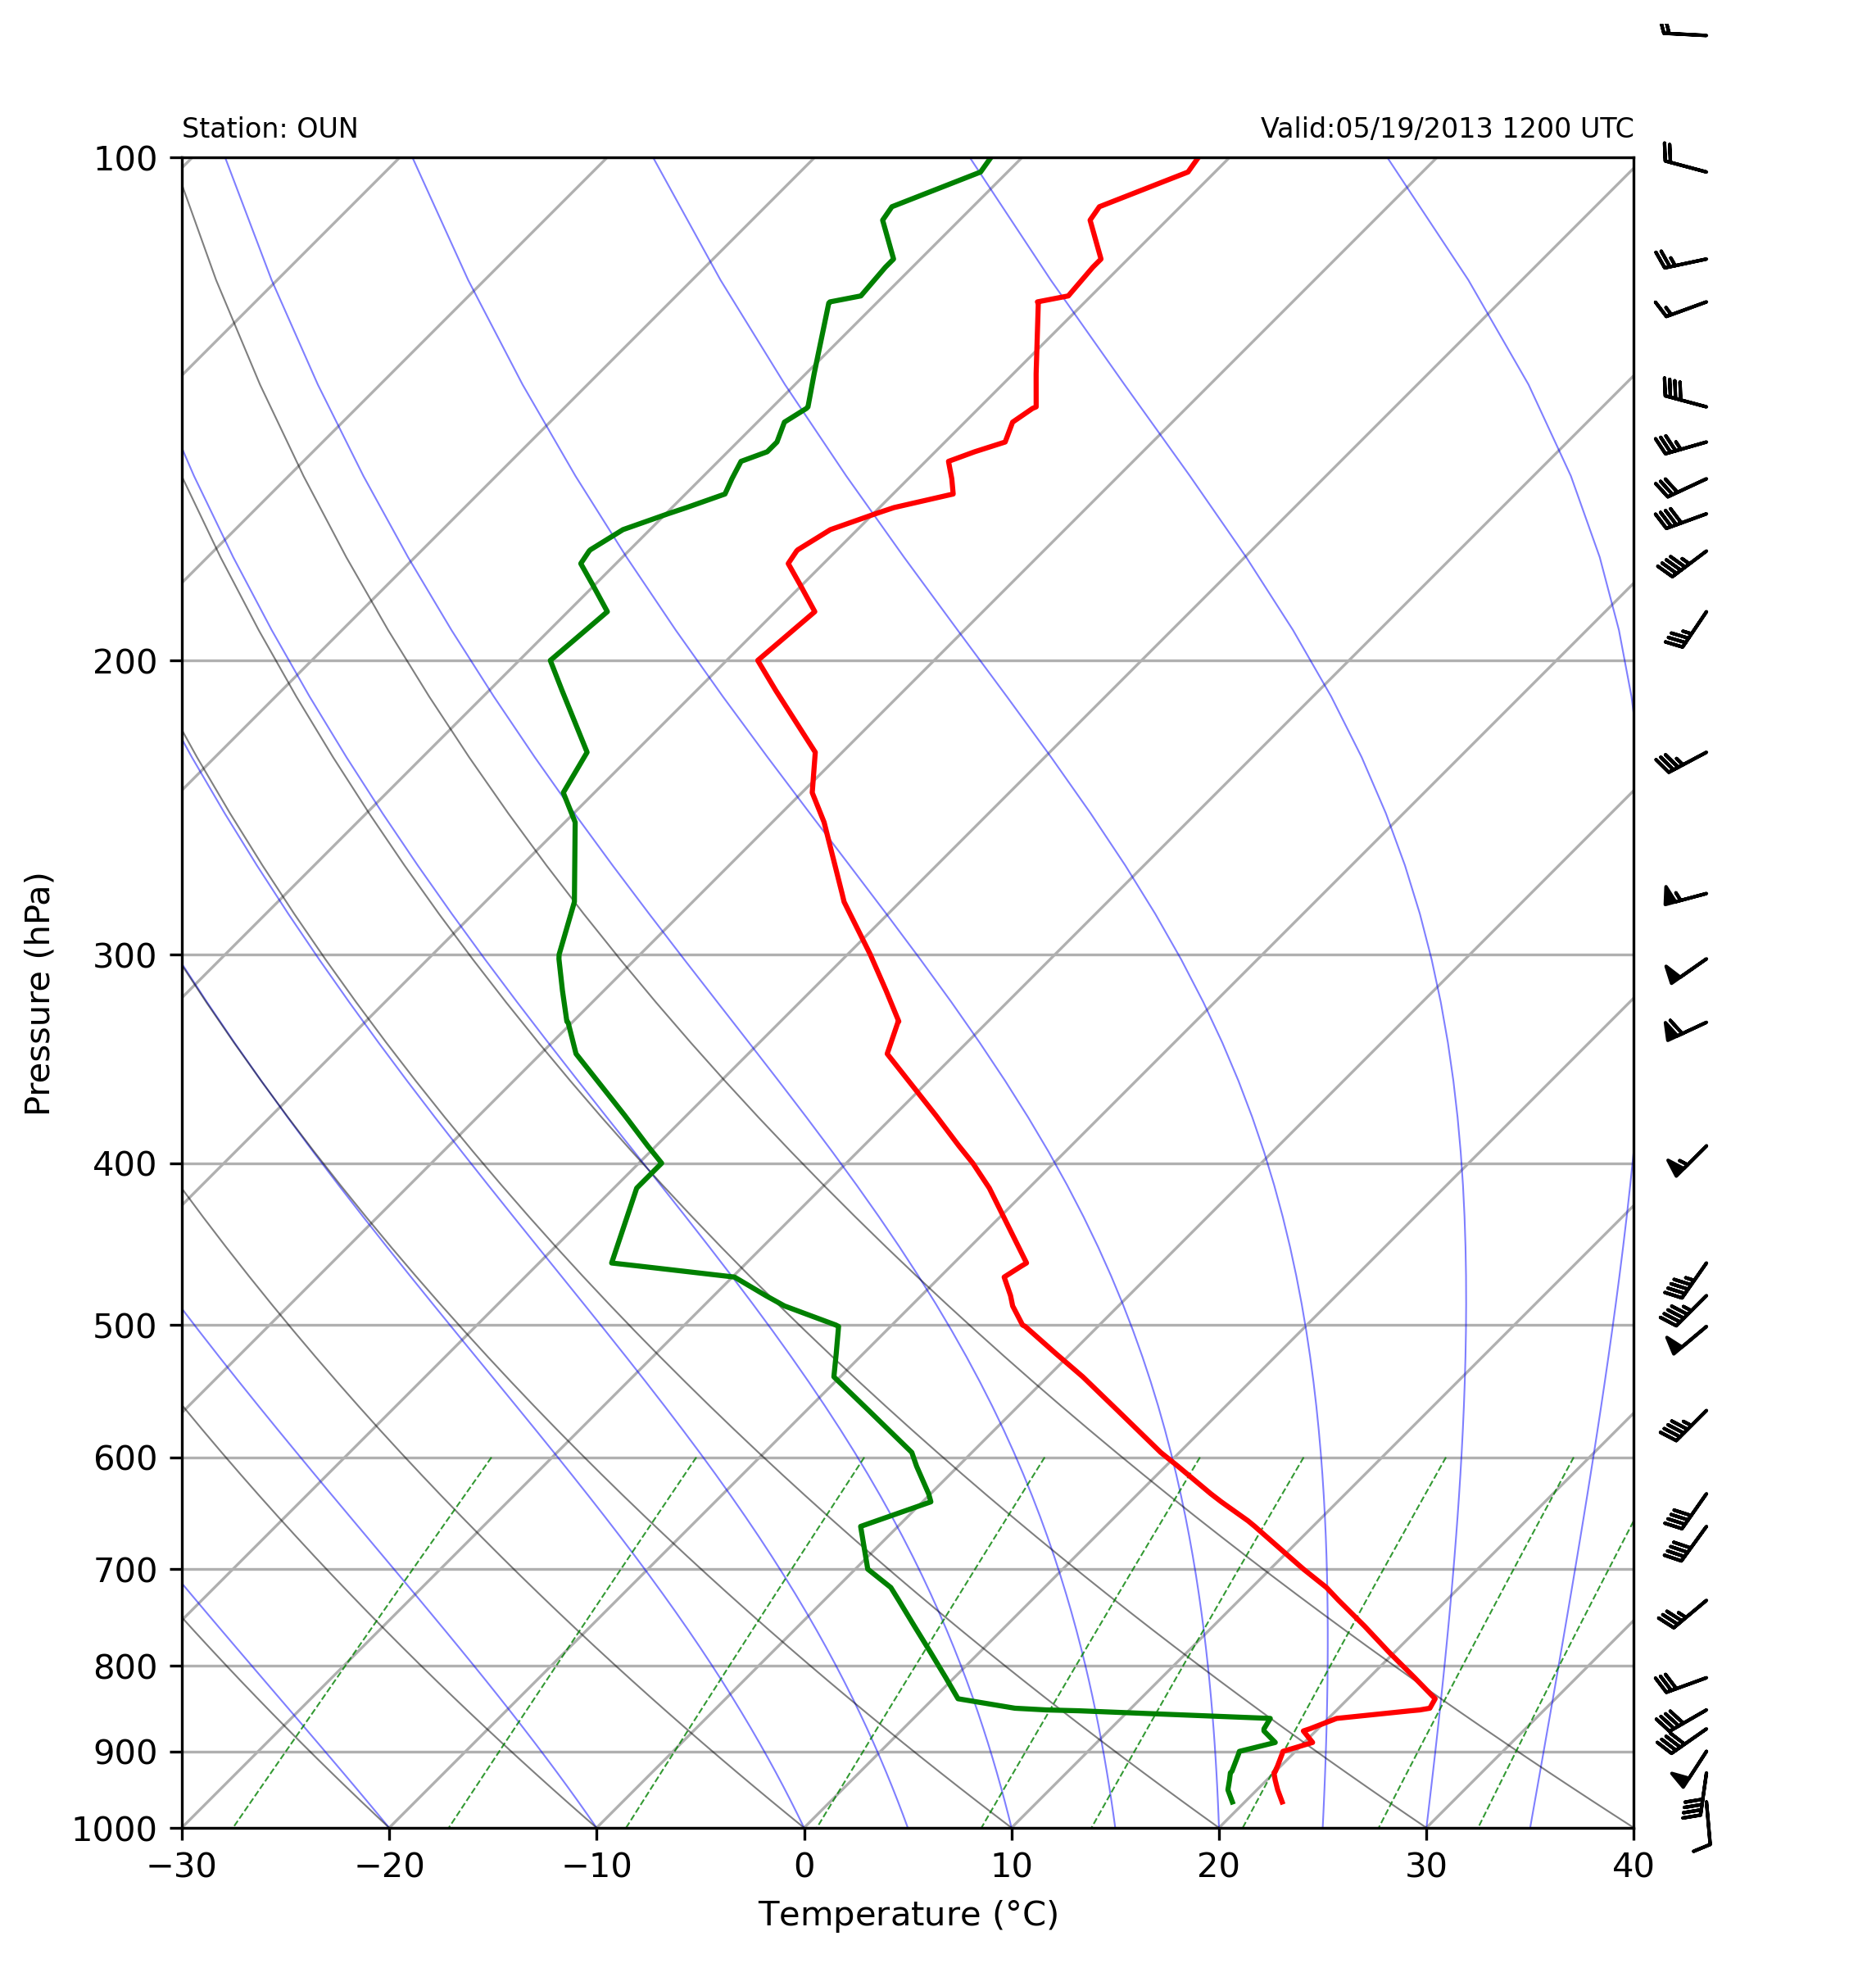

In [3]:
sites = ["OUN", "MPX", "ILX", "OUN", "OUN"]
times = [datetime(2013,5,20,12), datetime(2016,7,12,0), datetime(2011,2,2,0), datetime(1999,5,3,12), datetime(2013,5,19,12)]
for site, time in zip(sites, times):
    data = WyomingUpperAir.request_data(time, site)
    plot_skewT(data, site, time)

### You have now completed Part I of the lab.  Be sure to submit the fully rendered Jupyter Notebook on GitHub when you are finished.